# Import Libraries

In [ ]:
%matplotlib inline

In [ ]:
#pip install seaborn
#pip install hdbscan
#pip install sklearn

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

#import hdbscan
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('Encoded_Integrated_Data.csv')
data

Unnamed: 0      Country  Year ISO_CODE  yearly_average_temperature  \
0               0  Afghanistan  1960      AFG                   13.985417   
1               1  Afghanistan  1960      AFG                   13.985417   
2               2  Afghanistan  1960      AFG                   13.985417   
3               3  Afghanistan  1960      AFG                   13.985417   
4               4  Afghanistan  1961      AFG                   14.064917   
...           ...          ...   ...      ...                         ...   
27488       27488     Zimbabwe  2012      ZWE                   21.521333   
27489       27489     Zimbabwe  2012      ZWE                   21.521333   
27490       27490     Zimbabwe  2012      ZWE                   21.521333   
27491       27491     Zimbabwe  2012      ZWE                   21.521333   
27492       27492     Zimbabwe  2012      ZWE                   21.521333   

       yearly_average_temperature_uncertainty  Methane  Nitrous_oxide  \
0                                    0.441833    18.76           6.94   
1                                    0.441833    18.76           6.94   
2                                    0.441833    18.76           6.94   
3                                    0.441833    18.76           6.94   
4                                    0.398083    19.04           7.05   
...                                       ...      ...            ...   
27488                                0.538500    11.85           6.65   
27489                                0.538500    11.85           6.65   
27490                                0.538500    11.85           6.65   
27491                                0.538500    11.85           6.65   
27492                                0.538500    11.85           6.65   

       Total_ghg  Total_ghg_excl_lucf  Trade_co2  Total_Co2  Consumption_co2  \
0          43.61                26.26      4.825      7.233           52.630   
1          43.61                26.26      4.825      7.233           52.630   
2          43.61                26.26      4.825      7.233           52.630   
3          43.61                26.26      4.825      7.233           52.630   
4          44.00                26.65      2.799      8.663           33.225   
...          ...                  ...        ...        ...              ...   
27488      42.36                30.78      2.895     16.123           10.778   
27489      42.36                30.78      2.895     16.123           10.778   
27490      42.36                30.78      2.895     16.123           10.778   
27491      42.36                30.78      2.895     16.123           10.778   
27492      42.36                30.78      2.895     16.123           10.778   

       Population          GDP  Primary_Energy_Consumption   Latitude  \
0         8996967  13033254000                       2.950  33.939110   
1         8996967  13033254000                       2.950  33.939110   
2         8996967  13033254000                       2.950  33.939110   
3         8996967  13033254000                       2.950  33.939110   
4         9169406  13146287000                       3.018  33.939110   
...           ...          ...                         ...        ...   
27488    13115149  20909967517                      55.756 -19.015438   
27489    13115149  20909967517                      55.756 -19.015438   
27490    13115149  20909967517                      55.756 -19.015438   
27491    13115149  20909967517                      55.756 -19.015438   
27492    13115149  20909967517                      55.756 -19.015438   

       Longitude  Commodity_ID Commodity_Description  Area_Harvested_HA  \
0      67.709953        410000                 Wheat            2230000   
1      67.709953        422110          Rice, Milled             207000   
2      67.709953        430000                Barley             350000   
3      67.709953        440000                  Corn             50

In [ ]:
non_scaled_columns = ['Country','Year', 'ISO_CODE','Longitude','Latitude','Commodity_ID','Commodity_Description', 'Unnamed: 0']
instances = data[non_scaled_columns]
instances

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
0      Afghanistan  1960      AFG  67.709953  33.939110        410000   
1      Afghanistan  1960      AFG  67.709953  33.939110        422110   
2      Afghanistan  1960      AFG  67.709953  33.939110        430000   
3      Afghanistan  1960      AFG  67.709953  33.939110        440000   
4      Afghanistan  1961      AFG  67.709953  33.939110        410000   
...            ...   ...      ...        ...        ...           ...   
27488     Zimbabwe  2012      ZWE  29.154857 -19.015438        410000   
27489     Zimbabwe  2012      ZWE  29.154857 -19.015438        430000   
27490     Zimbabwe  2012      ZWE  29.154857 -19.015438        440000   
27491     Zimbabwe  2012      ZWE  29.154857 -19.015438        459100   
27492     Zimbabwe  2012      ZWE  29.154857 -19.015438        459200   

      Commodity_Description  Unnamed: 0  
0                     Wheat           0  
1              Rice, Milled           1  
2                    Barley           2  
3                      Corn           3  
4                     Wheat           4  
...                     ...         ...  
27488                 Wheat       27488  
27489                Barley       27489  
27490                  Corn       27490  
27491                Millet       27491  
27492               Sorghum       27492  

[27493 rows x 8 columns]

In [ ]:
data_to_normalize = data.drop(non_scaled_columns, axis=1)
scaled_columns = data_to_normalize.columns

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
scaled_data = pd.DataFrame(normalized_data, columns = scaled_columns)
print(scaled_data.shape)

(27493, 35)


In [ ]:
data[scaled_columns] = scaled_data[scaled_columns]

# Show any Two/Three Features

In [ ]:
scaled_data.columns

Index(['yearly_average_temperature', 'yearly_average_temperature_uncertainty',
       'Methane', 'Nitrous_oxide', 'Total_ghg', 'Total_ghg_excl_lucf',
       'Trade_co2', 'Total_Co2', 'Consumption_co2', 'Population', 'GDP',
       'Primary_Energy_Consumption', 'Area_Harvested_HA',
       'Beginning_Stocks_MT', 'Ending_Stocks_MT', 'Imports_MT', 'Exports_MT',
       'Feed_Dom_Consumption_MT', 'FSI_Consumption_MT', 'Production_MT',
       'TY_Imports_MT', 'TY_Imports_from_US_MT', 'TY_Exports_MT',
       'Milling_Rate_MT', 'Rough_Production_MT', 'Barley', 'Corn', 'Empty',
       'Millet', 'Mixed Grain', 'Oats', 'Rice, Milled', 'Rye', 'Sorghum',
       'Wheat'],
      dtype='object')

In [ ]:
# Input: Dataframe of n_instances x m_features, 
#   and the indices of 2 of the features to be used as axis
def scatter_2d(dataframe, x, y):
    plt.figure(figsize=(7,7))
    plt.scatter(dataframe.iloc[:,x], dataframe.iloc[:,y])
    plt.xlabel(dataframe.columns[x])
    plt.ylabel(dataframe.columns[y])
    plt.show()
    
# Input: Dataframe of n_instances x m_features, 
#   and the index of 3 of the features to be used as axis
def scatter_3d(dataframe, x, y, z):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(dataframe.iloc[:,x], dataframe.iloc[:,y], dataframe.iloc[:,z])
    ax.set_xlabel(dataframe.columns[x])
    ax.set_ylabel(dataframe.columns[y])
    ax.set_zlabel(dataframe.columns[z])
    plt.show()

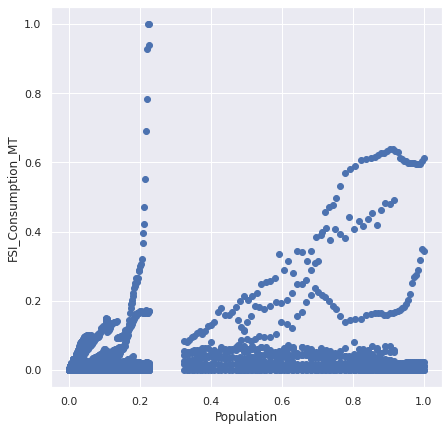

In [ ]:
scatter_2d(scaled_data, 9, 18)

# PCA for Dimensionality Reduction

In [ ]:
pca = PCA(n_components=0.95)
principal_components_var95 = pca.fit_transform(scaled_data)
print(scaled_data.shape)
print(principal_components_var95.shape)

(27493, 25)
(27493, 8)


In [ ]:
pca_columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 
               'Principal Component 4', 'Principal Component 5', 'Principal Component 6',
               'Principal Component 7', 'Principal Component 8']
pca_var95_df = pd.DataFrame(data=principal_components_var95, columns=pca_columns)

In [ ]:
def pca_plot_2d(pca_dataframe):
    scatter_2d(pca_dataframe, 0, 1)

def pca_plot_3d(pca_dataframe):
    scatter_3d(pca_dataframe, 0, 1, 2)

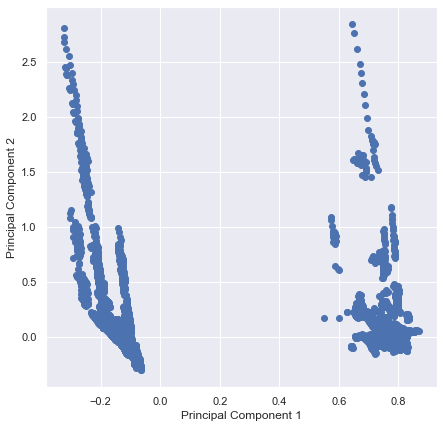

In [ ]:
pca_plot_2d(pca_var95_df)

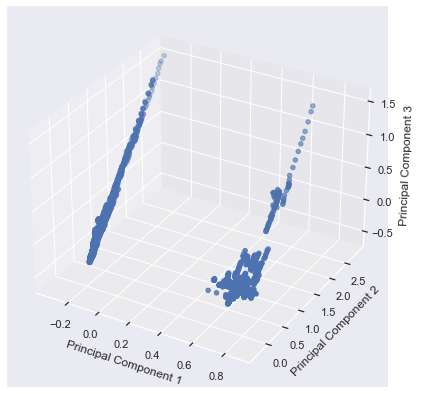

In [ ]:
pca_plot_3d(pca_var95_df)

# Testing DBSCAN on the 8 PCA Components (8 Components needed for 95% variance)

## Defining functions to fit and scatterplot the given dataframe to DBSCAN (and coloring according to cluster labels assigned)

### 2D Scatterplot

In [ ]:
def labeled_scatter_2d(dataframe, labels):
    fig = plt.figure(figsize=(7,7))
    sns.scatterplot(dataframe.iloc[:,0], dataframe.iloc[:,1], c=labels)
    
def dbscan_2d_scatter(dataframe, eps, min_samples):
    # Suggested from DBSCAN designers
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(dataframe)
    
    # My attempt at fine-tuning
    #model = DBSCAN(eps=eps, min_samples=min_samples).fit(dataframe)
    
    labels = model.labels_
    #dataframe['Cluster'] = labels
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))
    print("Estimated number of noise points: %d" % n_noise)

### 3D Scatterplots

In [ ]:
def labeled_scatter_3d(dataframe, labels):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(dataframe.iloc[:,0],dataframe.iloc[:,1],dataframe.iloc[:,2], c=labels)
    ax.set_xlabel(dataframe.columns[0])
    ax.set_ylabel(dataframe.columns[1])
    ax.set_zlabel(dataframe.columns[2])
    
    plt.show()
    
def dbscan_3d_scatter(dataframe, eps, min_samples):
    # Suggested from DBSCAN designers
    #model = DBSCAN(eps=eps, min_samples=2*len(dataframe.columns)).fit(dataframe)
    
    # My attempt at fine-tuning
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(dataframe)
    
    labels = model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))
    print("Estimated number of noise points: %d" % n_noise)
    

## Testing DBSCAN on All Numeric Features
* Tuned Parameters

### 2D Scatterplots

#### Default DBSCAN Parameters


Estimated number of clusters: 45
Silhouette Coefficient: 0.714
Estimated number of noise points: 17


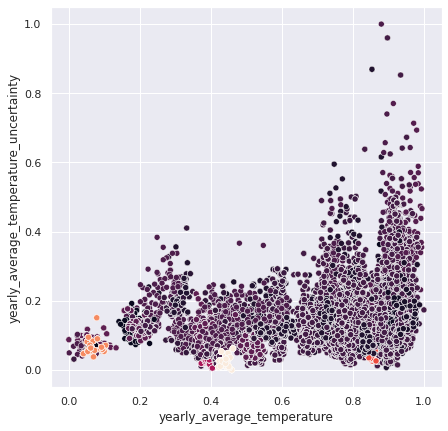

In [ ]:
dbscan_2d_scatter(scaled_data, 0.5, 5)

#### My attempts at tuning parameters


In [ ]:
dbscan_2d_scatter(scaled_data, 0.95, 15)

Estimated number of clusters: 16
Silhouette Coefficient: 0.746
Estimated number of noise points: 14


In [ ]:
dbscan_2d_scatter(scaled_data, 0.75, 20)

Estimated number of clusters: 18
Silhouette Coefficient: 0.752
Estimated number of noise points: 117


In [ ]:
dbscan_2d_scatter(scaled_data, 0.65, 10)

Estimated number of clusters: 23
Silhouette Coefficient: 0.747
Estimated number of noise points: 57


### 3D Scatterplots

#### Default DBSCAN Parameters


In [ ]:
dbscan_3d_scatter(scaled_data, 0.5, 5)

Estimated number of clusters: 18
Silhouette Coefficient: 0.650
Estimated number of noise points: 14


#### My attempt at tuning parameters


In [ ]:
dbscan_3d_scatter(scaled_data, 0.45, 7)

Estimated number of clusters: 17
Silhouette Coefficient: 0.649
Estimated number of noise points: 57


## Testing DBSCAN on 8 Principal Components
* Default Parameters
* Tuned Parameters

### 2D Scatterplots

#### Default DBSCAN Parameters


Estimated number of clusters: 8
Silhouette Coefficient: 0.645
Estimated number of noise points: 2


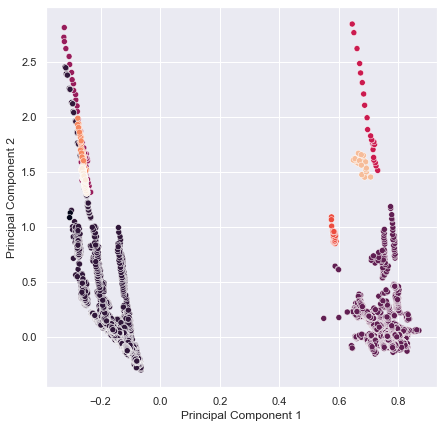

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.5, 5)

#### My attempts at tuning parameters


Estimated number of clusters: 9
Silhouette Coefficient: 0.645
Estimated number of noise points: 10


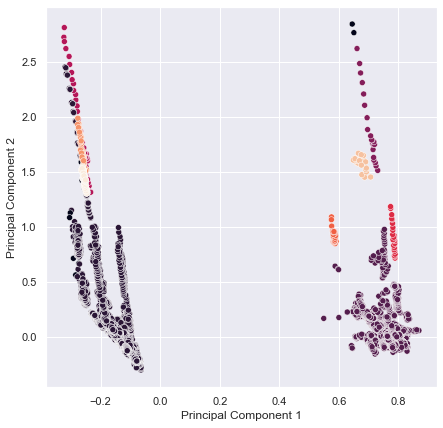

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.485, 7)

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.475, 7)

Estimated number of clusters: 10
Silhouette Coefficient: 0.654
Estimated number of noise points: 11


### 3D Scatterplots

#### Default DBSCAN Parameters


In [ ]:
dbscan_3d_scatter(pca_var95_df, 0.5, 5)

Estimated number of clusters: 8
Silhouette Coefficient: 0.645
Estimated number of noise points: 2


#### My attempt at tuning parameters


In [ ]:
dbscan_3d_scatter(pca_var95_df, 0.45, 7)

Estimated number of clusters: 13
Silhouette Coefficient: 0.656
Estimated number of noise points: 13


# Testing HDBSCAN on the 8 PCA Components (8 Components needed for 95% variance)

## Initial HDBSCAN tests

### Defining function to run and scatterplot HDBSCAN
* Input: Dataframe, (tuned HDBSCAB also takes min_cluster_size as input)

In [ ]:
def plot_default_hdbscan_2d(pca_dataframe):
    hdbscan_model = hdbscan.HDBSCAN().fit(pca_dataframe)
    hdbscan_labels = hdbscan_model.labels_
    n_clusters_hdbscan_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdbscan = list(hdbscan_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_hdbscan_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, hdbscan_labels))
    print('Estimated number of noise: %d' % n_noise_hdbscan)

    labeled_scatter_2d(pca_dataframe, hdbscan_labels)

def plot_tuned_hdbscan_2d(pca_dataframe, min_cluster_size):
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size).fit(pca_dataframe)
    hdbscan_labels = hdbscan_model.labels_
    n_clusters_hdbscan_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdbscan = list(hdbscan_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_hdbscan_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, hdbscan_labels))
    print('Estimated number of noise: %d' % n_noise_hdbscan)
    
    labeled_scatter_2d(pca_dataframe, hdbscan_labels)

In [ ]:
def plot_default_hdbscan_3d(pca_dataframe):
    hdbscan_model = hdbscan.HDBSCAN().fit(pca_dataframe)
    hdbscan_labels = hdbscan_model.labels_
    n_clusters_hdbscan_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdbscan = list(hdbscan_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_hdbscan_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, hdbscan_labels))
    print('Estimated number of noise: %d' % n_noise_hdbscan)
    

    labeled_scatter_3d(pca_dataframe, hdbscan_labels)

def plot_tuned_hdbscan_3d(pca_dataframe, min_cluster_size, min_samples):
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, min_samples=min_samples).fit(pca_dataframe)
    hdbscan_labels = hdbscan_model.labels_
    n_clusters_hdbscan_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdbscan = list(hdbscan_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_hdbscan_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, hdbscan_labels))
    print('Estimated number of noise: %d' % n_noise_hdbscan)
    
    labeled_scatter_3d(pca_dataframe, hdbscan_labels)

### Default HDBSCAN w/ 8 Principal Components

Estimated number of clusters: 963
Silhouette Coefficient: -0.209
Estimated number of noise: 13011


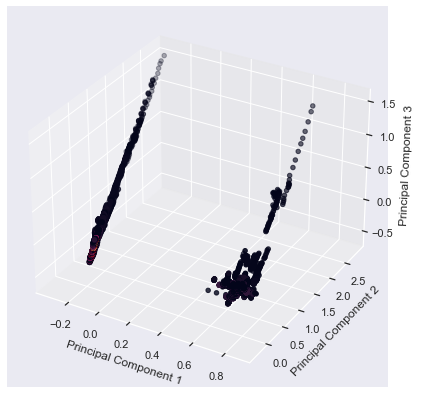

In [ ]:
plot_default_hdbscan_3d(pca_var95_df)

### Tuned HDBSCAN w/ 8 Principal Components
* Input: MinMaxScaled Dataframe, min_cluster_size, min_samples


In [ ]:
plot_tuned_hdbscan_3d(pca_var95_df, 50, 15)

Estimated number of clusters: 31
Silhouette Coefficient: -0.145
Estimated number of noise: 7886


Estimated number of clusters: 2
Silhouette Coefficient: 0.648
Estimated number of noise: 186


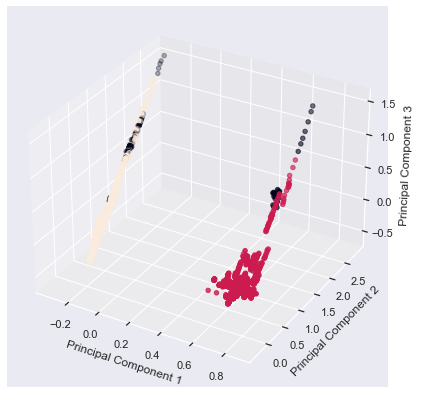

In [ ]:
plot_tuned_hdbscan_3d(pca_var95_df, 500, 15)

### Two Large Clusters

Estimated number of clusters: 2
Silhouette Coefficient: 0.646
Estimated number of noise: 186


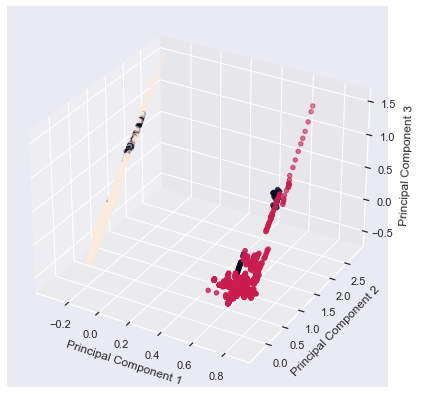

In [ ]:
plot_tuned_hdbscan_3d(pca_var95_df, 500, 5)

# Testing OPTICS Clustering model with 8 Principal Components

## Initial OPTICS tests

### Defining function to run and scatterplot OPTICS
* Input: MinMaxScaled Dataframe, (tuned OPTICS also takes min_cluster_size as input)

#### 2D Scatterplot

In [ ]:
def plot_default_optics_2d(pca_dataframe):
    optics_model = OPTICS().fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)

    labeled_scatter_2d(pca_dataframe, optics_labels)

def plot_tuned_dbscan_optics_2d(pca_dataframe, min_samples):
    optics_model = OPTICS(cluster_method = 'dbscan', min_samples = min_samples, max_eps=0.5).fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)
    
    labeled_scatter_2d(pca_dataframe, optics_labels)

def plot_tuned_xi_optics_2d(pca_dataframe, min_samples, min_cluster_size, xi):
    optics_model = OPTICS(cluster_method = 'xi', min_samples = min_samples, min_cluster_size = min_cluster_size, xi=xi, max_eps=0.5).fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)
    
    labeled_scatter_2d(pca_dataframe, optics_labels)

#### 3D Scatterplot

In [ ]:
def plot_default_optics_3d(pca_dataframe):
    optics_model = OPTICS().fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)
    
    labeled_scatter_3d(pca_dataframe, optics_labels)

def plot_tuned_dbscan_optics_3d(pca_dataframe, min_samples):
    optics_model = OPTICS(cluster_method = 'dbscan', min_samples = min_samples, max_eps=0.5).fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)
    
    labeled_scatter_3d(pca_dataframe, optics_labels)

def plot_tuned_xi_optics_3d(pca_dataframe, min_samples, min_cluster_size, xi):
    optics_model = OPTICS(cluster_method = 'xi', min_samples = min_samples, min_cluster_size=min_cluster_size, max_eps=0.5, xi = xi).fit(pca_dataframe)
    optics_labels = optics_model.labels_
    n_clusters_optics_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_optics = list(optics_labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_optics_)
    print('Silhouette Coefficient: %0.3f' % silhouette_score(pca_dataframe, optics_labels))
    print('Estimated number of noise: %d' % n_noise_optics)

    labeled_scatter_3d(pca_dataframe, optics_labels)

### Default OPTICS w/ 8 Principal Components

In [ ]:
plot_default_optics_3d(pca_var95_df)

Estimated number of clusters: 1564
Silhouette Coefficient: -0.266
Estimated number of noise: 14684


### OPTICS parameters & options

* min_samples: int number of samples in neighborhood, > 1, for point to be a core point. def = 5.
* max_eps: max distance between two samples to be considered in the same neighborhood. def = np.inf. reducing max_eps reduces run-time
* cluster_method = 'dbscan' or default('xi')
* xi: 0 < float < 1, def = 0.05. Determines the min steepness on reachabolity plot that consitutes a cluster boundary. ONLY USED WHEN cluster_method='xi'
* min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2). If None, the value of min_samples is used instead. Used only when cluster_method='xi'.


### Tuned OPTICS DBSCAN 2D

Estimated number of clusters: 7
Silhouette Coefficient: 0.646
Estimated number of noise: 48


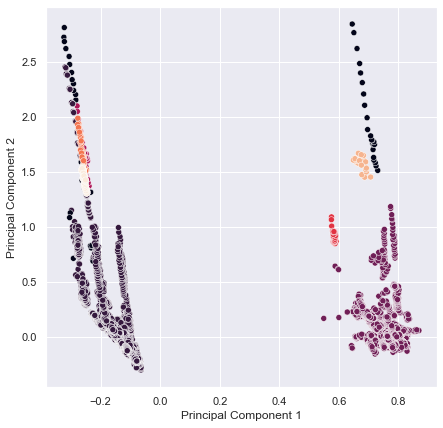

In [ ]:
plot_tuned_dbscan_optics_2d(pca_var95_df, min_samples=20)

In [ ]:
plot_tuned_dbscan_optics_2d(pca_var95_df, min_samples=25)

Estimated number of clusters: 4
Silhouette Coefficient: 0.646
Estimated number of noise: 184


In [ ]:
plot_tuned_dbscan_optics_2d(pca_var95_df, min_samples=23)

Estimated number of clusters: 8
Silhouette Coefficient: 0.644
Estimated number of noise: 83


### Tuned OPTICS DBSCAN 3D

Estimated number of clusters: 7
Silhouette Coefficient: 0.646
Estimated number of noise: 48


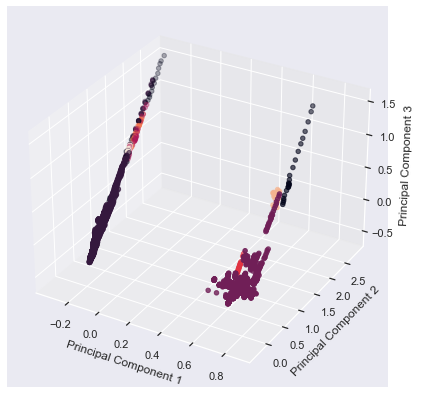

In [ ]:
plot_tuned_dbscan_optics_3d(pca_var95_df, min_samples=20)

Estimated number of clusters: 4
Silhouette Coefficient: 0.646
Estimated number of noise: 184


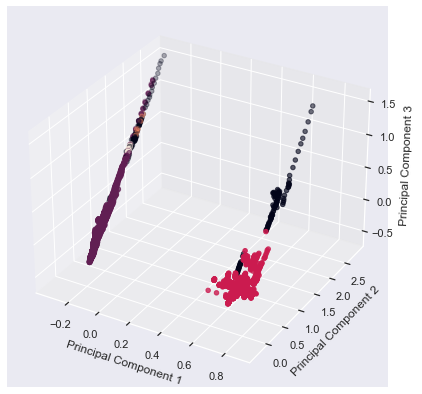

In [ ]:
plot_tuned_dbscan_optics_3d(pca_var95_df, min_samples=25)

Estimated number of clusters: 8
Silhouette Coefficient: 0.644
Estimated number of noise: 83


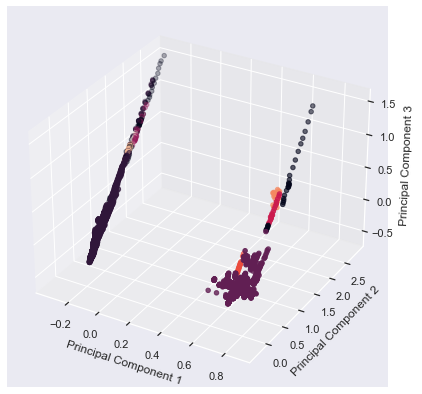

In [ ]:
plot_tuned_dbscan_optics_3d(pca_var95_df, min_samples=23)

### Tuned OPTICS XI 2D

Estimated number of clusters: 2
Silhouette Coefficient: 0.333
Estimated number of noise: 23287


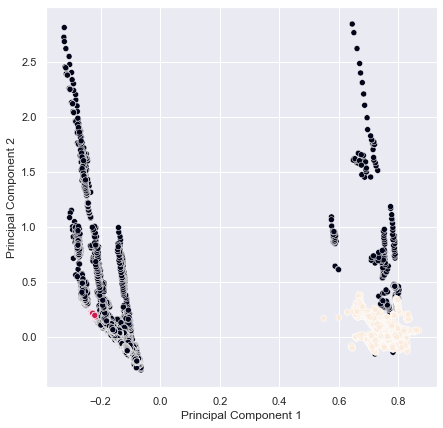

In [ ]:
plot_tuned_xi_optics_2d(pca_var95_df, min_samples=50, min_cluster_size=200, xi=0.05)

Estimated number of clusters: 2
Silhouette Coefficient: 0.656
Estimated number of noise: 528


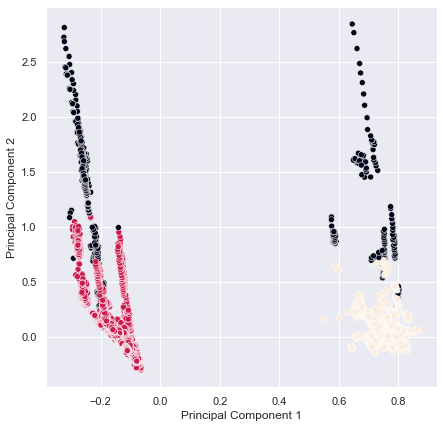

In [ ]:
plot_tuned_xi_optics_2d(pca_var95_df, min_samples=100, min_cluster_size=200, xi=0.1)

Estimated number of clusters: 2
Silhouette Coefficient: 0.656
Estimated number of noise: 528


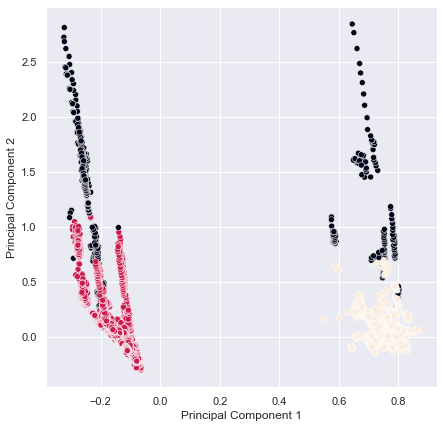

In [ ]:
plot_tuned_xi_optics_2d(pca_var95_df, min_samples=100, min_cluster_size=200, xi=0.5)

Estimated number of clusters: 2
Silhouette Coefficient: 0.659
Estimated number of noise: 675


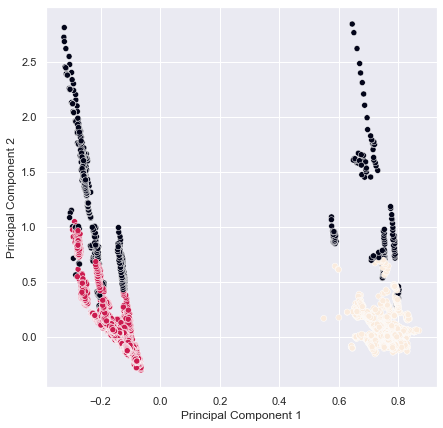

In [ ]:
plot_tuned_xi_optics_2d(pca_var95_df, min_samples=200, min_cluster_size=500, xi=0.5)

### Tuned OPTICS XI 3D

Estimated number of clusters: 2
Silhouette Coefficient: 0.333
Estimated number of noise: 23287


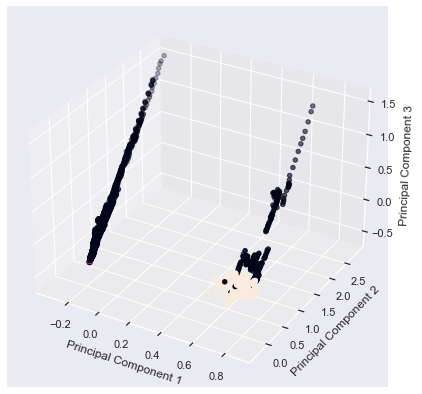

In [ ]:
plot_tuned_xi_optics_3d(pca_var95_df, min_samples=50, min_cluster_size=200, xi=0.05)

Estimated number of clusters: 2
Silhouette Coefficient: 0.656
Estimated number of noise: 528


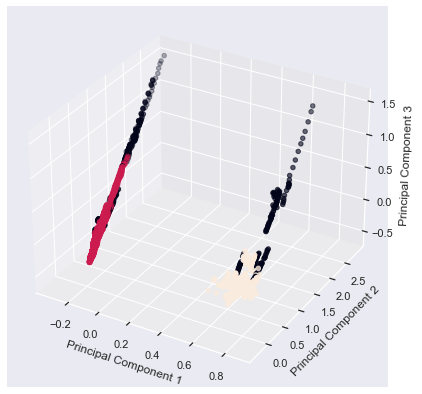

In [ ]:
plot_tuned_xi_optics_3d(pca_var95_df, min_samples=100, min_cluster_size=200, xi=0.1)

Estimated number of clusters: 2
Silhouette Coefficient: 0.656
Estimated number of noise: 528


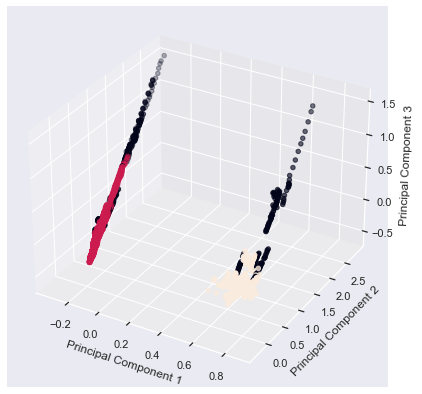

In [ ]:
plot_tuned_xi_optics_3d(pca_var95_df, min_samples=100, min_cluster_size=200, xi=0.5)

Estimated number of clusters: 2
Silhouette Coefficient: 0.659
Estimated number of noise: 675


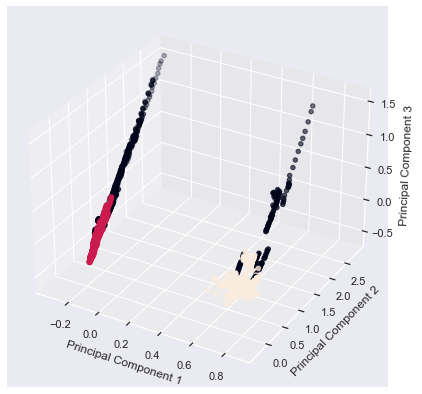

In [ ]:
plot_tuned_xi_optics_3d(pca_var95_df, min_samples=200, min_cluster_size=500, xi=0.5)

# Testing KMeans Clustering model with 8 Principal Components

In [ ]:
def kmeans_2d_scatter(dataframe, n_clusters):
    
    model = KMeans(n_clusters = n_clusters).fit(dataframe)
    
    labels = model.labels_
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def kmeans_3d_scatter(dataframe, n_clusters):
    
    model = KMeans(n_clusters = n_clusters).fit(dataframe)
    
    labels = model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

Number of clusters: 3
Silhouette Coefficient: 0.357


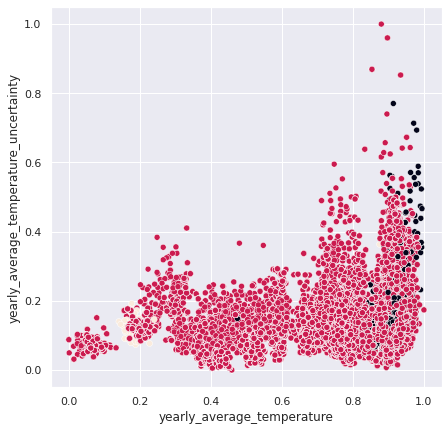

In [ ]:
kmeans_2d_scatter(scaled_data, 3)

Number of clusters: 4
Silhouette Coefficient: 0.475


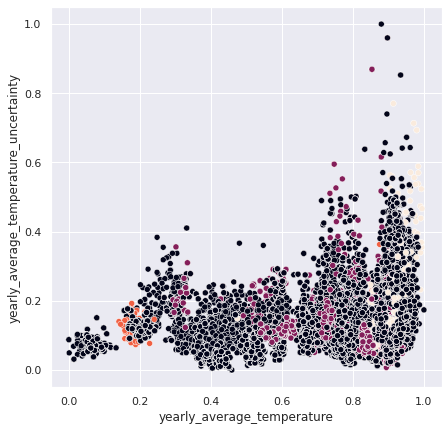

In [ ]:
kmeans_2d_scatter(scaled_data, 4)

Number of clusters: 5
Silhouette Coefficient: 0.551


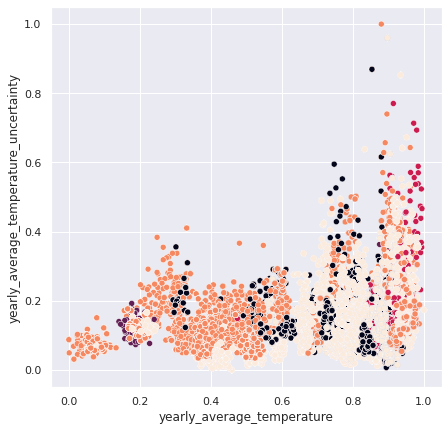

In [ ]:
kmeans_2d_scatter(scaled_data, 5)

Number of clusters: 6
Silhouette Coefficient: 0.611


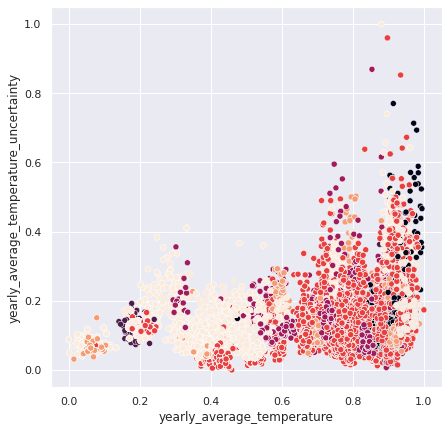

In [ ]:
kmeans_2d_scatter(scaled_data, 6)

Number of clusters: 7
Silhouette Coefficient: 0.669


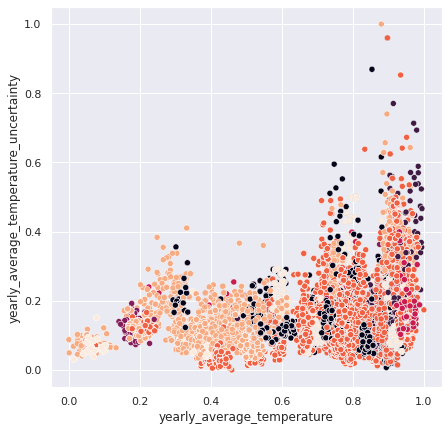

In [ ]:
kmeans_2d_scatter(scaled_data, 7)

Number of clusters: 16
Silhouette Coefficient: 0.660


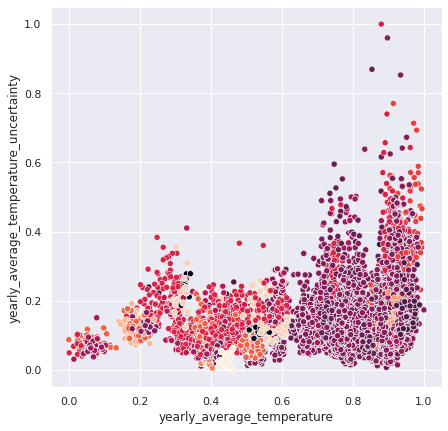

In [ ]:
kmeans_2d_scatter(scaled_data, 16)

# Testing Agglomerative Hierarhical  Clustering model with 8 Principal Components

## Defining functions to run/scatter plot Agglomerative Clustering results

In [ ]:
def agglomerative_single_2d_scatter(dataframe, n_clusters):
    
    single_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='single').fit(dataframe)
    
    
    labels = single_model.labels_
    
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_complete_2d_scatter(dataframe, n_clusters):
    
    complete_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='complete').fit(dataframe)
    
    
    labels = complete_model.labels_
    
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_average_2d_scatter(dataframe, n_clusters):
    
    average_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='average').fit(dataframe)
    
    
    labels = average_model.labels_
    
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_ward_2d_scatter(dataframe, n_clusters):
    
    ward_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward').fit(dataframe)
    
    
    labels = ward_model.labels_
    
    
    labeled_scatter_2d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

In [ ]:
def agglomerative_single_3d_scatter(dataframe, n_clusters):
    
    single_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='single').fit(dataframe)
    
    
    labels = single_model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_complete_3d_scatter(dataframe, n_clusters):
    
    complete_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='complete').fit(dataframe)
    
    
    labels = complete_model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_average_3d_scatter(dataframe, n_clusters):
    
    average_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='average').fit(dataframe)
    
    
    labels = average_model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

def agglomerative_ward_3d_scatter(dataframe, n_clusters):
    
    ward_model = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward').fit(dataframe)
    
    
    labels = ward_model.labels_
    
    
    labeled_scatter_3d(dataframe, labels)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Number of clusters: %d" % n_clusters)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))

## Single Link

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 2)

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 3)

Number of clusters: 4
Silhouette Coefficient: 0.263


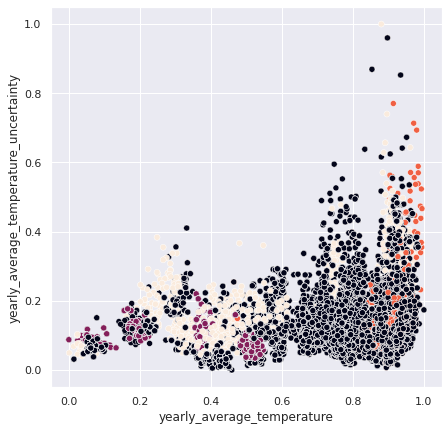

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 4)

Number of clusters: 5
Silhouette Coefficient: 0.308


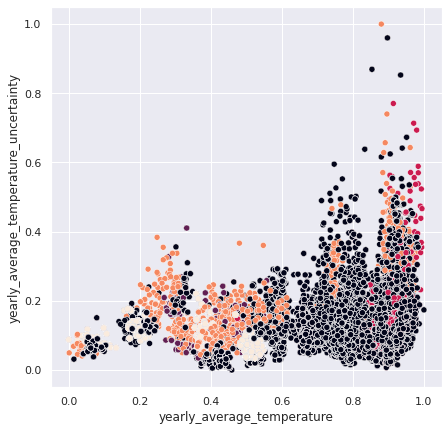

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 5)

In [ ]:
agglomerative_single_2d_scatter(pca_var95_df, 6)

Number of clusters: 7
Silhouette Coefficient: 0.460


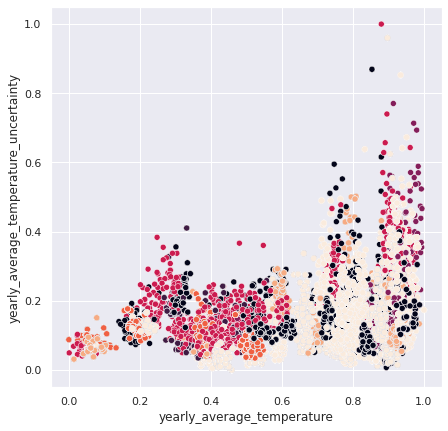

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 7)

Number of clusters: 16
Silhouette Coefficient: 0.746


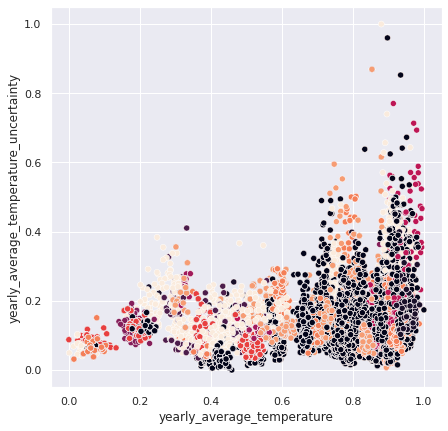

In [ ]:
agglomerative_single_2d_scatter(scaled_data, 16)

## Complete Link

Number of clusters: 3
Silhouette Coefficient: 0.630


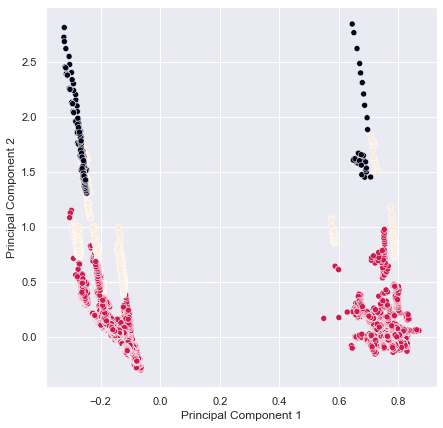

In [ ]:
agglomerative_complete_2d_scatter(pca_var95_df, 3)

Number of clusters: 4
Silhouette Coefficient: 0.630


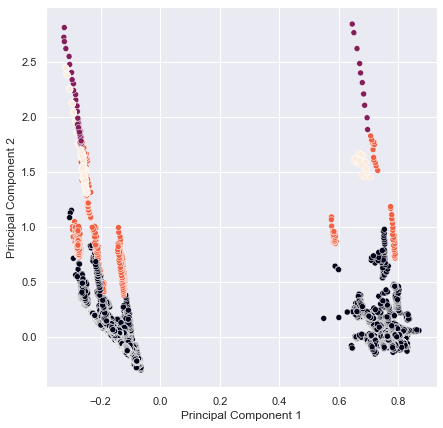

In [ ]:
agglomerative_complete_2d_scatter(pca_var95_df, 4)

Number of clusters: 5
Silhouette Coefficient: 0.631


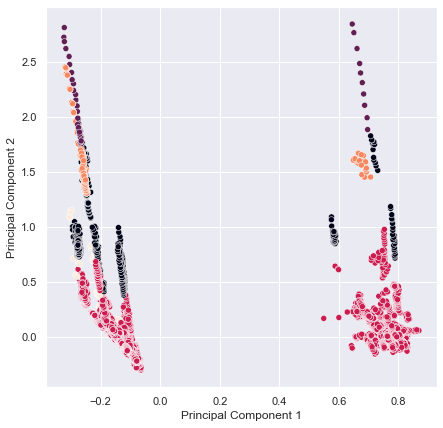

In [ ]:
agglomerative_complete_2d_scatter(pca_var95_df, 5)

Number of clusters: 6
Silhouette Coefficient: 0.629


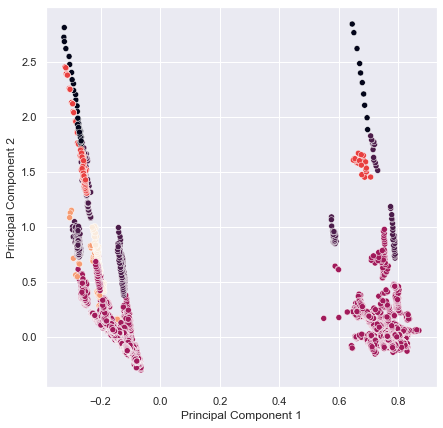

In [ ]:
agglomerative_complete_2d_scatter(pca_var95_df, 6)

Number of clusters: 7
Silhouette Coefficient: 0.629


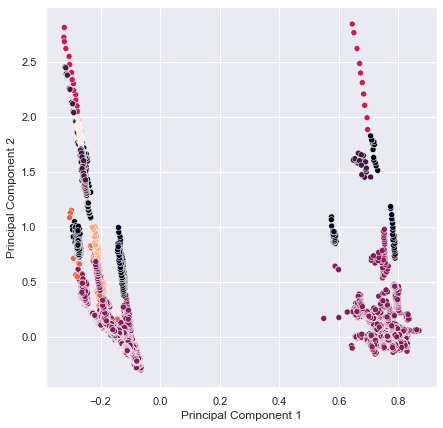

In [ ]:
agglomerative_complete_2d_scatter(pca_var95_df, 7)

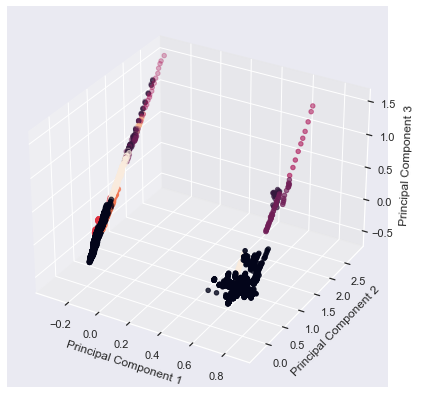

Number of clusters: 8
Silhouette Coefficient: 0.599


In [ ]:
agglomerative_complete_3d_scatter(pca_var95_df, 8)

## Average

Number of clusters: 2
Silhouette Coefficient: 0.759


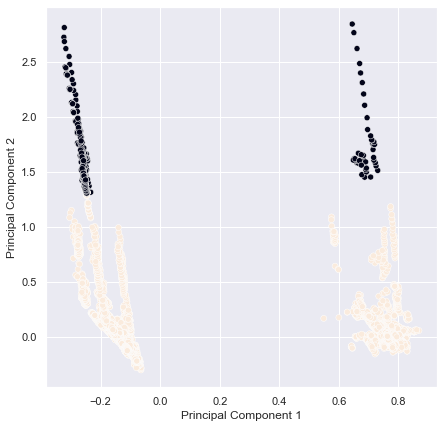

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 2)

Number of clusters: 3
Silhouette Coefficient: 0.754


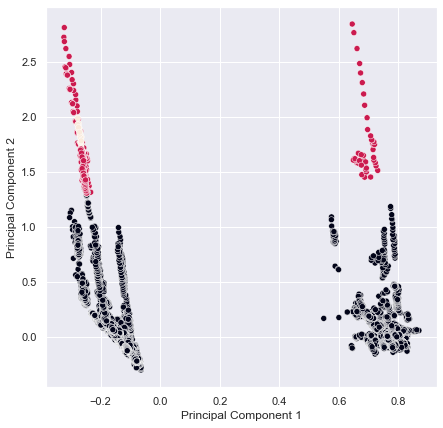

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 3)

Number of clusters: 4
Silhouette Coefficient: 0.680


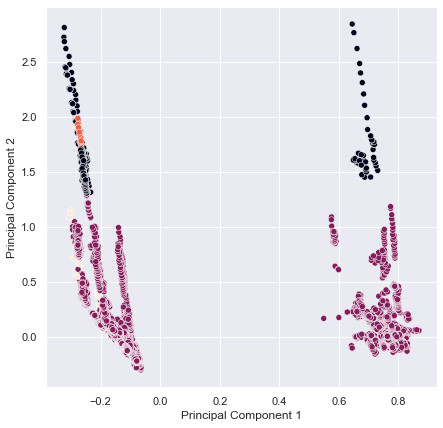

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 4)

Number of clusters: 5
Silhouette Coefficient: 0.680


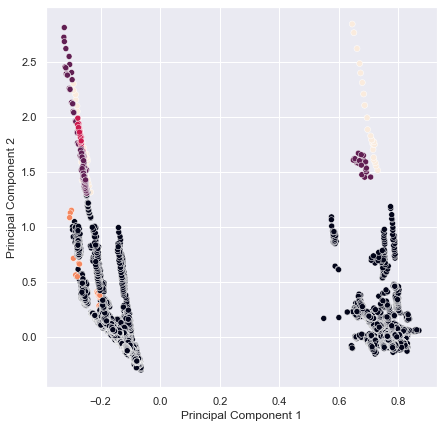

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 5)

Number of clusters: 6
Silhouette Coefficient: 0.638


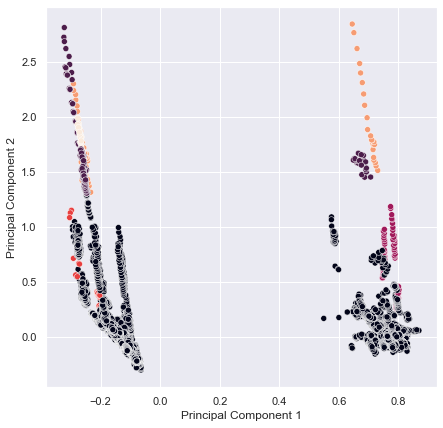

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 6)

In [ ]:
agglomerative_average_2d_scatter(pca_var95_df, 7)

Number of clusters: 7
Silhouette Coefficient: 0.598


## Ward

Number of clusters: 2
Silhouette Coefficient: 0.628


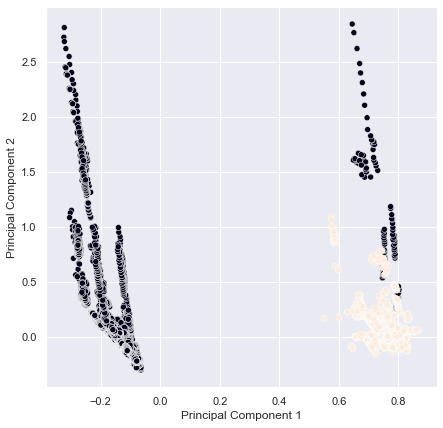

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 2)

Number of clusters: 3
Silhouette Coefficient: 0.656


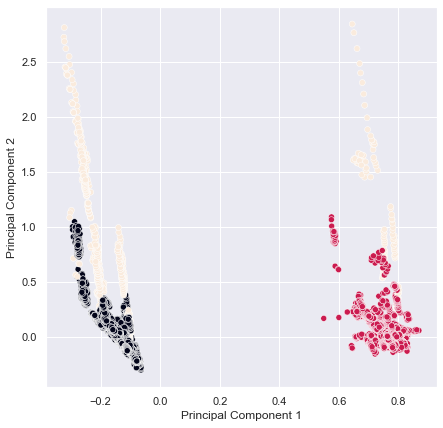

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 3)

Number of clusters: 4
Silhouette Coefficient: 0.529


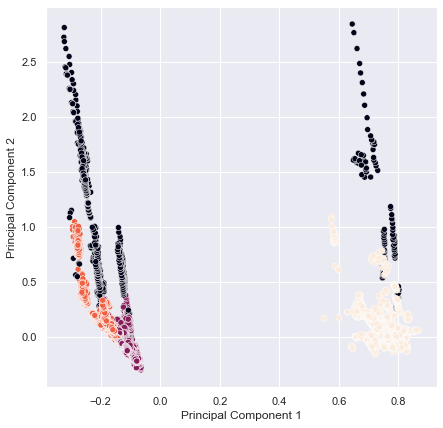

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 4)

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 5)

Number of clusters: 5
Silhouette Coefficient: 0.534


In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 6)

Number of clusters: 6
Silhouette Coefficient: 0.538


Number of clusters: 7
Silhouette Coefficient: 0.488


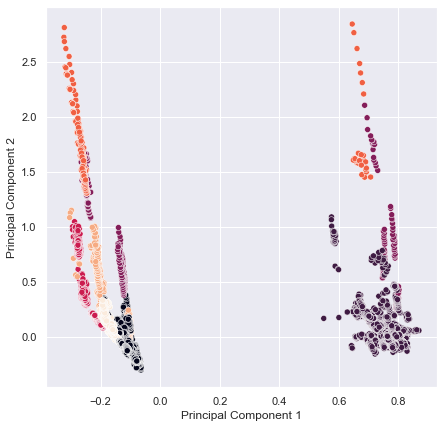

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 7)

Number of clusters: 4
Silhouette Coefficient: 0.529


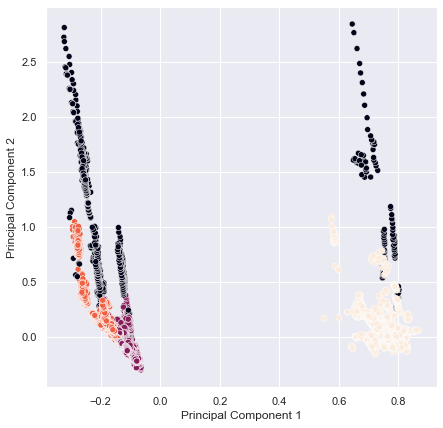

In [ ]:
agglomerative_ward_2d_scatter(pca_var95_df, 4)

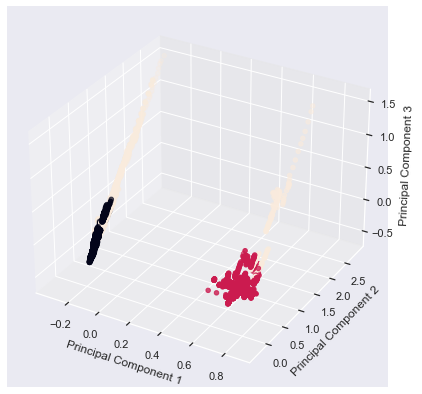

Number of clusters: 3
Silhouette Coefficient: 0.656


In [ ]:
agglomerative_ward_3d_scatter(pca_var95_df, 3)

# Choosing Final Cluster Results

In [ ]:
dbscan_all_df = data.copy()

In [ ]:
dbscan_all = DBSCAN(eps=0.475, min_samples=7).fit(scaled_data)

In [ ]:
dbscan_all_df['Clusters'] = dbscan_all.labels_

In [ ]:
dbscan_all_df[scaled_columns] = scaled_data[scaled_columns]

In [ ]:
dbscan_all_df['Clusters'].unique()

array([ 0,  1,  2, -1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

In [ ]:
n_clusters = len(set(dbscan_all.labels_)) - (1 if -1 in dbscan_all.labels_ else 0)
n_noise = list(dbscan_all.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Silhouette Coefficient: %0.3f" % silhouette_score(scaled_data, dbscan_all.labels_))
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 17
Silhouette Coefficient: 0.649
Estimated number of noise points: 54


In [ ]:
dbscan_all_df.describe()

Year  yearly_average_temperature  \
count  27493.000000                27493.000000   
mean    1987.087695                    0.705094   
std       15.097474                    0.216189   
min     1960.000000                    0.000000   
25%     1974.000000                    0.532528   
50%     1988.000000                    0.780752   
75%     2000.000000                    0.879509   
max     2012.000000                    1.000000   

       yearly_average_temperature_uncertainty       Methane  Nitrous_oxide  \
count                            27493.000000  27493.000000   27493.000000   
mean                                 0.135682      0.033770       0.027642   
std                                  0.083657      0.100095       0.082896   
min                                  0.000000      0.000000       0.000000   
25%                                  0.081492      0.004604       0.005951   
50%                                  0.117789      0.010911       0.009720   
75%                                  0.166107      0.016636       0.014163   
max                                  1.000000      1.000000       1.000000   

          Total_ghg  Total_ghg_excl_lucf     Trade_co2     Total_Co2  \
count  27493.000000         27493.000000  27493.000000  27493.000000   
mean       0.032421             0.014988      0.735278      0.021581   
std        0.065587             0.065890      0.040470      0.075501   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.017910             0.001112      0.737228      0.001103   
50%        0.019544             0.002201      0.738860      0.003268   
75%        0.021021             0.004419      0.739035      0.010804   
max        1.000000             1.000000      1.000000      1.000000   

       Consumption_co2    Population           GDP  \
count     27493.000000  27493.000000  27493.000000   
mean          0.018018      0.036377      0.025401   
std           0.070630      0.115877      0.086601   
min           0.000000      0.000000      0.000000   
25%           0.004480      0.003161      0.000979   
50%           0.007397      0.007512      0.003338   
75%           0.007523      0.020704      0.013708   
max           1.000000      1.000000      1.000000   

       Primary_Energy_Consumption      Latitude     Longitude   Commodity_ID  \
count                27493.000000  27493.000000  27493.000000   27493.000000   
mean                     0.024841     16.645310     17.492705  417094.228713   
std                      0.092122     24.733142     63.376813   86289.483895   
min                      0.000000    -40.900557   -106.346771       0.000000   
25%                      0.000404      4.210484    -10.940835  422110.000000   
50%                      0.002498     18.109581     25.013607  430000.000000   
75%                      0.010631     35.861660     47.576927  451000.000000   
max                      1.000000     64.963051    179.414413  459900.000000   

       Area_Harvested_HA  Beginning_Stocks_MT  Ending_Stocks_MT    Imports_MT  \
count       27493.000000         27493.000000      27493.000000  27493.000000   
mean            0.023705             0.005017          0.005090      0.016609   
std             0.083060             0.038569          0.038898      0.059232   
min             0.000000             0.000000          0.000000      0.000000   
25%             0.000110             0.000000          0.000000      0.000000   
50%             0.001669             0.000000          0.000000      0.000949   
75%             0.010102             0.000645          0.000694      0.008599   
max             1.000000             1.000000          1.000000      1.000000   

         Exports_MT  Feed_Dom_Consumption_MT  FSI_Consumption_MT  \
count  27493.000000             27493.000000        27493.000000   
mean       0.005238                 0.005044            0.006233   
std        0.041193                 0.039405            0.033

In [ ]:
clusters_all_features = dbscan_all_df.groupby('Clusters')

In [ ]:
clusters_all_features.get_group(-1)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5861           China  1990      CHN  104.195397  35.86166        410000   
5868           China  1991      CHN  104.195397  35.86166        410000   
5875           China  1992      CHN  104.195397  35.86166        410000   
5889           China  1994      CHN  104.195397  35.86166        410000   
5897           China  1995      CHN  104.195397  35.86166        410000   
5962           China  2003      CHN  104.195397  35.86166        440000   
5966           China  2004      CHN  104.195397  35.86166        410000   
5967           China  2004      CHN  104.195397  35.86166        422110   
5969           China  2004      CHN  104.195397  35.86166        440000   
5973           China  2005      CHN  104.195397  35.86166        410000   
5974           China  2005      CHN  104.195397  35.86166        422110   
5976           China  2005      CHN  104.195397  35.86166        440000   
5980           China  2006      CHN  104.195397  35.86166        410000   
5981           China  2006      CHN  104.195397  35.86166        422110   
5983           China  2006      CHN  104.195397  35.86166        440000   
5987           China  2007      CHN  104.195397  35.86166        410000   
5988           China  2007      CHN  104.195397  35.86166        422110   
5990           China  2007      CHN  104.195397  35.86166        440000   
5994           China  2008      CHN  104.195397  35.86166        410000   
5995           China  2008      CHN  104.195397  35.86166        422110   
5997           China  2008      CHN  104.195397  35.86166        440000   
6001           China  2009      CHN  104.195397  35.86166        410000   
6002           China  2009      CHN  104.195397  35.86166        422110   
6004           China  2009      CHN  104.195397  35.86166        440000   
6008           China  2010      CHN  104.195397  35.86166        410000   
6009           China  2010      CHN  104.195397  35.86166        422110   
6011           China  2010      CHN  104.195397  35.86166        440000   
6015           China  2011      CHN  104.195397  35.86166        410000   
6016           China  2011      CHN  104.195397  35.86166        422110   
6018           China  2011      CHN  104.195397  35.86166        440000   
6022           China  2012      CHN  104.195397  35.86166        410000   
6023           China  2012      CHN  104.195397  35.86166        422110   
6025           China  2012      CHN  104.195397  35.86166        440000   
20078         Russia  1987      RUS  105.318756  61.52401        410000   
20085         Russia  1988      RUS  105.318756  61.52401        410000   
20088         Russia  1988      RUS  105.318756  61.52401        440000   
20093         Russia  1989      RUS  105.318756  61.52401        410000   
20096         Russia  1989      RUS  105.318756  61.52401        440000   
20101         Russia  1990      RUS  105.318756  61.52401        410000   
20109         Russia  1991      RUS  105.318756  61.52401        410000   
20116         Russia  1992      RUS  105.318756  61.52401        410000   
25608  United States  1960      USA  -95.712891  37.09024        410000   
25611  United States  1960      USA  -95.712891  37.09024        440000   
25615  United States  1961      USA  -95.712891  37.09024        410000   
25618  United States  1961      USA  -95.712891  37.09024        440000   
25622  United States  1962      USA  -95.712891  37.09024        410000   
25625  United States  1962      USA  -95.712891  37.09024        440000   
25632  United States  1963      USA  -95.712891  37.09024        440000   
25772  United States  1983      USA  -95.712891  37.09024        440000   
25786  United States  1985      USA  -95.712891  37.09024        440000   
25793  United States  1986      USA  -95.712891  37.09024        440000   
25800  United States  1987      USA  -95.712891  37.09024        440000   
25807  United States  1988      USA  -

In [ ]:
clusters_all_features.get_group(0)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
0      Afghanistan  1960      AFG  67.709953  33.939110        410000   
2      Afghanistan  1960      AFG  67.709953  33.939110        430000   
3      Afghanistan  1960      AFG  67.709953  33.939110        440000   
4      Afghanistan  1961      AFG  67.709953  33.939110        410000   
6      Afghanistan  1961      AFG  67.709953  33.939110        430000   
...            ...   ...      ...        ...        ...           ...   
27488     Zimbabwe  2012      ZWE  29.154857 -19.015438        410000   
27489     Zimbabwe  2012      ZWE  29.154857 -19.015438        430000   
27490     Zimbabwe  2012      ZWE  29.154857 -19.015438        440000   
27491     Zimbabwe  2012      ZWE  29.154857 -19.015438        459100   
27492     Zimbabwe  2012      ZWE  29.154857 -19.015438        459200   

      Commodity_Description  Clusters  
0                     Wheat         0  
2                    Barley         0  
3                      Corn         0  
4                     Wheat         0  
6                    Barley         0  
...                     ...       ...  
27488                 Wheat         0  
27489                Barley         0  
27490                  Corn         0  
27491                Millet         0  
27492               Sorghum         0  

[22874 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(1)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
1      Afghanistan  1960      AFG  67.709953  33.939110        422110   
5      Afghanistan  1961      AFG  67.709953  33.939110        422110   
9      Afghanistan  1962      AFG  67.709953  33.939110        422110   
13     Afghanistan  1963      AFG  67.709953  33.939110        422110   
17     Afghanistan  1964      AFG  67.709953  33.939110        422110   
...            ...   ...      ...        ...        ...           ...   
27225       Zambia  2008      ZMB  27.849332 -13.133897        422110   
27230       Zambia  2009      ZMB  27.849332 -13.133897        422110   
27235       Zambia  2010      ZMB  27.849332 -13.133897        422110   
27240       Zambia  2011      ZMB  27.849332 -13.133897        422110   
27245       Zambia  2012      ZMB  27.849332 -13.133897        422110   

      Commodity_Description  Clusters  
1              Rice, Milled         1  
5              Rice, Milled         1  
9              Rice, Milled         1  
13             Rice, Milled         1  
17             Rice, Milled         1  
...                     ...       ...  
27225          Rice, Milled         1  
27230          Rice, Milled         1  
27235          Rice, Milled         1  
27240          Rice, Milled         1  
27245          Rice, Milled         1  

[3878 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(2)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5652   China  1960      CHN  104.195397  35.86166        422110   
5659   China  1961      CHN  104.195397  35.86166        422110   
5666   China  1962      CHN  104.195397  35.86166        422110   
5673   China  1963      CHN  104.195397  35.86166        422110   
5680   China  1964      CHN  104.195397  35.86166        422110   
5687   China  1965      CHN  104.195397  35.86166        422110   
5694   China  1966      CHN  104.195397  35.86166        422110   
5701   China  1967      CHN  104.195397  35.86166        422110   
5708   China  1968      CHN  104.195397  35.86166        422110   
5715   China  1969      CHN  104.195397  35.86166        422110   
5722   China  1970      CHN  104.195397  35.86166        422110   
5729   China  1971      CHN  104.195397  35.86166        422110   
5736   China  1972      CHN  104.195397  35.86166        422110   
5743   China  1973      CHN  104.195397  35.86166        422110   
5750   China  1974      CHN  104.195397  35.86166        422110   
5757   China  1975      CHN  104.195397  35.86166        422110   
5764   China  1976      CHN  104.195397  35.86166        422110   
5771   China  1977      CHN  104.195397  35.86166        422110   
5778   China  1978      CHN  104.195397  35.86166        422110   
5785   China  1979      CHN  104.195397  35.86166        422110   
5792   China  1980      CHN  104.195397  35.86166        422110   
5799   China  1981      CHN  104.195397  35.86166        422110   
5806   China  1982      CHN  104.195397  35.86166        422110   
5813   China  1983      CHN  104.195397  35.86166        422110   
5820   China  1984      CHN  104.195397  35.86166        422110   
5827   China  1985      CHN  104.195397  35.86166        422110   
5834   China  1986      CHN  104.195397  35.86166        422110   
5841   China  1987      CHN  104.195397  35.86166        422110   
5848   China  1988      CHN  104.195397  35.86166        422110   
5855   China  1989      CHN  104.195397  35.86166        422110   

     Commodity_Description  Clusters  
5652          Rice, Milled         2  
5659          Rice, Milled         2  
5666          Rice, Milled         2  
5673          Rice, Milled         2  
5680          Rice, Milled         2  
5687          Rice, Milled         2  
5694          Rice, Milled         2  
5701          Rice, Milled         2  
5708          Rice, Milled         2  
5715          Rice, Milled         2  
5722          Rice, Milled         2  
5729          Rice, Milled         2  
5736          Rice, Milled         2  
5743          Rice, Milled         2  
5750          Rice, Milled         2  
5757          Rice, Milled         2  
5764          Rice, Milled         2  
5771          Rice, Milled         2  
5778          Rice, Milled         2  
5785          Rice, Milled         2  
5792          Rice, Milled         2  
5799          Rice, Milled         2  
5806          Rice, Milled         2  
5813          Rice, Milled         2  
5820          Rice, Milled         2  
5827          Rice, Milled         2  
5834          Rice, Milled         2  
5841          Rice, Milled         2  
5848          Rice, Milled         2  
5855          Rice, Milled         2

In [ ]:
clusters_all_features.get_group(3)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5862   China  1990      CHN  104.195397  35.86166        422110   
5869   China  1991      CHN  104.195397  35.86166        422110   
5876   China  1992      CHN  104.195397  35.86166        422110   
5883   China  1993      CHN  104.195397  35.86166        422110   
5890   China  1994      CHN  104.195397  35.86166        422110   
5898   China  1995      CHN  104.195397  35.86166        422110   
5906   China  1996      CHN  104.195397  35.86166        422110   
5914   China  1997      CHN  104.195397  35.86166        422110   
5922   China  1998      CHN  104.195397  35.86166        422110   
5930   China  1999      CHN  104.195397  35.86166        422110   
5938   China  2000      CHN  104.195397  35.86166        422110   
5945   China  2001      CHN  104.195397  35.86166        422110   
5953   China  2002      CHN  104.195397  35.86166        422110   
5960   China  2003      CHN  104.195397  35.86166        422110   

     Commodity_Description  Clusters  
5862          Rice, Milled         3  
5869          Rice, Milled         3  
5876          Rice, Milled         3  
5883          Rice, Milled         3  
5890          Rice, Milled         3  
5898          Rice, Milled         3  
5906          Rice, Milled         3  
5914          Rice, Milled         3  
5922          Rice, Milled         3  
5930          Rice, Milled         3  
5938          Rice, Milled         3  
5945          Rice, Milled         3  
5953          Rice, Milled         3  
5960          Rice, Milled         3

In [ ]:
clusters_all_features.get_group(4)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5863   China  1990      CHN  104.195397  35.86166        430000   
5865   China  1990      CHN  104.195397  35.86166        452000   
5866   China  1990      CHN  104.195397  35.86166        459100   
5867   China  1990      CHN  104.195397  35.86166        459200   
5870   China  1991      CHN  104.195397  35.86166        430000   
...      ...   ...      ...         ...       ...           ...   
6021   China  2011      CHN  104.195397  35.86166        459200   
6024   China  2012      CHN  104.195397  35.86166        430000   
6026   China  2012      CHN  104.195397  35.86166        452000   
6027   China  2012      CHN  104.195397  35.86166        459100   
6028   China  2012      CHN  104.195397  35.86166        459200   

     Commodity_Description  Clusters  
5863                Barley         4  
5865                  Oats         4  
5866                Millet         4  
5867               Sorghum         4  
5870                Barley         4  
...                    ...       ...  
6021               Sorghum         4  
6024                Barley         4  
6026                  Oats         4  
6027                Millet         4  
6028               Sorghum         4  

[99 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(5)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5864   China  1990      CHN  104.195397  35.86166        440000   
5871   China  1991      CHN  104.195397  35.86166        440000   
5878   China  1992      CHN  104.195397  35.86166        440000   
5885   China  1993      CHN  104.195397  35.86166        440000   
5892   China  1994      CHN  104.195397  35.86166        440000   
5900   China  1995      CHN  104.195397  35.86166        440000   
5908   China  1996      CHN  104.195397  35.86166        440000   
5916   China  1997      CHN  104.195397  35.86166        440000   
5924   China  1998      CHN  104.195397  35.86166        440000   
5932   China  1999      CHN  104.195397  35.86166        440000   
5940   China  2000      CHN  104.195397  35.86166        440000   
5947   China  2001      CHN  104.195397  35.86166        440000   
5955   China  2002      CHN  104.195397  35.86166        440000   

     Commodity_Description  Clusters  
5864                  Corn         5  
5871                  Corn         5  
5878                  Corn         5  
5885                  Corn         5  
5892                  Corn         5  
5900                  Corn         5  
5908                  Corn         5  
5916                  Corn         5  
5924                  Corn         5  
5932                  Corn         5  
5940                  Corn         5  
5947                  Corn         5  
5955                  Corn         5

In [ ]:
clusters_all_features.get_group(6)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
5882   China  1993      CHN  104.195397  35.86166        410000   
5905   China  1996      CHN  104.195397  35.86166        410000   
5913   China  1997      CHN  104.195397  35.86166        410000   
5921   China  1998      CHN  104.195397  35.86166        410000   
5929   China  1999      CHN  104.195397  35.86166        410000   
5937   China  2000      CHN  104.195397  35.86166        410000   
5944   China  2001      CHN  104.195397  35.86166        410000   
5952   China  2002      CHN  104.195397  35.86166        410000   
5959   China  2003      CHN  104.195397  35.86166        410000   

     Commodity_Description  Clusters  
5882                 Wheat         6  
5905                 Wheat         6  
5913                 Wheat         6  
5921                 Wheat         6  
5929                 Wheat         6  
5937                 Wheat         6  
5944                 Wheat         6  
5952                 Wheat         6  
5959                 Wheat         6

In [ ]:
clusters_all_features.get_group(7)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
10497   India  1960      IND   78.96288  20.593684        422110   
10503   India  1961      IND   78.96288  20.593684        422110   
10509   India  1962      IND   78.96288  20.593684        422110   
10515   India  1963      IND   78.96288  20.593684        422110   
10521   India  1964      IND   78.96288  20.593684        422110   
10527   India  1965      IND   78.96288  20.593684        422110   
10533   India  1966      IND   78.96288  20.593684        422110   
10539   India  1967      IND   78.96288  20.593684        422110   
10545   India  1968      IND   78.96288  20.593684        422110   
10551   India  1969      IND   78.96288  20.593684        422110   
10557   India  1970      IND   78.96288  20.593684        422110   
10563   India  1971      IND   78.96288  20.593684        422110   
10569   India  1972      IND   78.96288  20.593684        422110   
10575   India  1973      IND   78.96288  20.593684        422110   
10581   India  1974      IND   78.96288  20.593684        422110   
10587   India  1975      IND   78.96288  20.593684        422110   
10593   India  1976      IND   78.96288  20.593684        422110   
10599   India  1977      IND   78.96288  20.593684        422110   
10605   India  1978      IND   78.96288  20.593684        422110   
10611   India  1979      IND   78.96288  20.593684        422110   
10617   India  1980      IND   78.96288  20.593684        422110   
10623   India  1981      IND   78.96288  20.593684        422110   
10629   India  1982      IND   78.96288  20.593684        422110   
10635   India  1983      IND   78.96288  20.593684        422110   
10641   India  1984      IND   78.96288  20.593684        422110   
10647   India  1985      IND   78.96288  20.593684        422110   
10653   India  1986      IND   78.96288  20.593684        422110   
10659   India  1987      IND   78.96288  20.593684        422110   
10665   India  1988      IND   78.96288  20.593684        422110   
10671   India  1989      IND   78.96288  20.593684        422110   

      Commodity_Description  Clusters  
10497          Rice, Milled         7  
10503          Rice, Milled         7  
10509          Rice, Milled         7  
10515          Rice, Milled         7  
10521          Rice, Milled         7  
10527          Rice, Milled         7  
10533          Rice, Milled         7  
10539          Rice, Milled         7  
10545          Rice, Milled         7  
10551          Rice, Milled         7  
10557          Rice, Milled         7  
10563          Rice, Milled         7  
10569          Rice, Milled         7  
10575          Rice, Milled         7  
10581          Rice, Milled         7  
10587          Rice, Milled         7  
10593          Rice, Milled         7  
10599          Rice, Milled         7  
10605          Rice, Milled         7  
10611          Rice, Milled         7  
10617          Rice, Milled         7  
10623          Rice, Milled         7  
10629          Rice, Milled         7  
10635          Rice, Milled         7  
10641          Rice, Milled         7  
10647          Rice, Milled         7  
10653          Rice, Milled         7  
10659          Rice, Milled         7  
10665          Rice, Milled         7  
10671          Rice, Milled         7

In [ ]:
clusters_all_features.get_group(8)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
10676   India  1990      IND   78.96288  20.593684        410000   
10678   India  1990      IND   78.96288  20.593684        430000   
10679   India  1990      IND   78.96288  20.593684        440000   
10680   India  1990      IND   78.96288  20.593684        459100   
10681   India  1990      IND   78.96288  20.593684        459200   
...       ...   ...      ...        ...        ...           ...   
10822   India  2012      IND   78.96288  20.593684        430000   
10823   India  2012      IND   78.96288  20.593684        440000   
10824   India  2012      IND   78.96288  20.593684        452000   
10825   India  2012      IND   78.96288  20.593684        459100   
10826   India  2012      IND   78.96288  20.593684        459200   

      Commodity_Description  Clusters  
10676                 Wheat         8  
10678                Barley         8  
10679                  Corn         8  
10680                Millet         8  
10681               Sorghum         8  
...                     ...       ...  
10822                Barley         8  
10823                  Corn         8  
10824                  Oats         8  
10825                Millet         8  
10826               Sorghum         8  

[128 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(9)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
10677   India  1990      IND   78.96288  20.593684        422110   
10683   India  1991      IND   78.96288  20.593684        422110   
10689   India  1992      IND   78.96288  20.593684        422110   
10695   India  1993      IND   78.96288  20.593684        422110   
10701   India  1994      IND   78.96288  20.593684        422110   
10707   India  1995      IND   78.96288  20.593684        422110   
10713   India  1996      IND   78.96288  20.593684        422110   
10719   India  1997      IND   78.96288  20.593684        422110   
10725   India  1998      IND   78.96288  20.593684        422110   
10731   India  1999      IND   78.96288  20.593684        422110   
10737   India  2000      IND   78.96288  20.593684        422110   
10744   India  2001      IND   78.96288  20.593684        422110   
10751   India  2002      IND   78.96288  20.593684        422110   
10758   India  2003      IND   78.96288  20.593684        422110   
10765   India  2004      IND   78.96288  20.593684        422110   
10772   India  2005      IND   78.96288  20.593684        422110   
10779   India  2006      IND   78.96288  20.593684        422110   
10786   India  2007      IND   78.96288  20.593684        422110   
10793   India  2008      IND   78.96288  20.593684        422110   
10800   India  2009      IND   78.96288  20.593684        422110   
10807   India  2010      IND   78.96288  20.593684        422110   
10814   India  2011      IND   78.96288  20.593684        422110   
10821   India  2012      IND   78.96288  20.593684        422110   

      Commodity_Description  Clusters  
10677          Rice, Milled         9  
10683          Rice, Milled         9  
10689          Rice, Milled         9  
10695          Rice, Milled         9  
10701          Rice, Milled         9  
10707          Rice, Milled         9  
10713          Rice, Milled         9  
10719          Rice, Milled         9  
10725          Rice, Milled         9  
10731          Rice, Milled         9  
10737          Rice, Milled         9  
10744          Rice, Milled         9  
10751          Rice, Milled         9  
10758          Rice, Milled         9  
10765          Rice, Milled         9  
10772          Rice, Milled         9  
10779          Rice, Milled         9  
10786          Rice, Milled         9  
10793          Rice, Milled         9  
10800          Rice, Milled         9  
10807          Rice, Milled         9  
10814          Rice, Milled         9  
10821          Rice, Milled         9

In [ ]:
clusters_all_features.get_group(10)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
20102  Russia  1990      RUS  105.318756  61.52401        422110   
20110  Russia  1991      RUS  105.318756  61.52401        422110   
20117  Russia  1992      RUS  105.318756  61.52401        422110   
20124  Russia  1993      RUS  105.318756  61.52401        422110   
20131  Russia  1994      RUS  105.318756  61.52401        422110   
20139  Russia  1995      RUS  105.318756  61.52401        422110   
20146  Russia  1996      RUS  105.318756  61.52401        422110   
20153  Russia  1997      RUS  105.318756  61.52401        422110   
20160  Russia  1998      RUS  105.318756  61.52401        422110   
20167  Russia  1999      RUS  105.318756  61.52401        422110   
20174  Russia  2000      RUS  105.318756  61.52401        422110   
20181  Russia  2001      RUS  105.318756  61.52401        422110   
20188  Russia  2002      RUS  105.318756  61.52401        422110   
20195  Russia  2003      RUS  105.318756  61.52401        422110   
20202  Russia  2004      RUS  105.318756  61.52401        422110   
20209  Russia  2005      RUS  105.318756  61.52401        422110   
20216  Russia  2006      RUS  105.318756  61.52401        422110   
20223  Russia  2007      RUS  105.318756  61.52401        422110   
20230  Russia  2008      RUS  105.318756  61.52401        422110   
20237  Russia  2009      RUS  105.318756  61.52401        422110   
20244  Russia  2010      RUS  105.318756  61.52401        422110   
20251  Russia  2011      RUS  105.318756  61.52401        422110   
20258  Russia  2012      RUS  105.318756  61.52401        422110   

      Commodity_Description  Clusters  
20102          Rice, Milled        10  
20110          Rice, Milled        10  
20117          Rice, Milled        10  
20124          Rice, Milled        10  
20131          Rice, Milled        10  
20139          Rice, Milled        10  
20146          Rice, Milled        10  
20153          Rice, Milled        10  
20160          Rice, Milled        10  
20167          Rice, Milled        10  
20174          Rice, Milled        10  
20181          Rice, Milled        10  
20188          Rice, Milled        10  
20195          Rice, Milled        10  
20202          Rice, Milled        10  
20209          Rice, Milled        10  
20216          Rice, Milled        10  
20223          Rice, Milled        10  
20230          Rice, Milled        10  
20237          Rice, Milled        10  
20244          Rice, Milled        10  
20251          Rice, Milled        10  
20258          Rice, Milled        10

In [ ]:
clusters_all_features.get_group(11)

Country  Year ISO_CODE   Longitude  Latitude  Commodity_ID  \
20103  Russia  1990      RUS  105.318756  61.52401        430000   
20104  Russia  1990      RUS  105.318756  61.52401        440000   
20105  Russia  1990      RUS  105.318756  61.52401        451000   
20106  Russia  1990      RUS  105.318756  61.52401        452000   
20107  Russia  1990      RUS  105.318756  61.52401        459100   
...       ...   ...      ...         ...       ...           ...   
20259  Russia  2012      RUS  105.318756  61.52401        430000   
20260  Russia  2012      RUS  105.318756  61.52401        440000   
20261  Russia  2012      RUS  105.318756  61.52401        451000   
20262  Russia  2012      RUS  105.318756  61.52401        452000   
20263  Russia  2012      RUS  105.318756  61.52401        459100   

      Commodity_Description  Clusters  
20103                Barley        11  
20104                  Corn        11  
20105                   Rye        11  
20106                  Oats        11  
20107                Millet        11  
...                     ...       ...  
20259                Barley        11  
20260                  Corn        11  
20261                   Rye        11  
20262                  Oats        11  
20263                Millet        11  

[137 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(12)

Country  Year ISO_CODE  Longitude  Latitude  Commodity_ID  \
25639  United States  1964      USA -95.712891  37.09024        440000   
25646  United States  1965      USA -95.712891  37.09024        440000   
25653  United States  1966      USA -95.712891  37.09024        440000   
25660  United States  1967      USA -95.712891  37.09024        440000   
25667  United States  1968      USA -95.712891  37.09024        440000   
25674  United States  1969      USA -95.712891  37.09024        440000   
25681  United States  1970      USA -95.712891  37.09024        440000   
25688  United States  1971      USA -95.712891  37.09024        440000   
25695  United States  1972      USA -95.712891  37.09024        440000   
25702  United States  1973      USA -95.712891  37.09024        440000   
25709  United States  1974      USA -95.712891  37.09024        440000   
25716  United States  1975      USA -95.712891  37.09024        440000   
25723  United States  1976      USA -95.712891  37.09024        440000   
25730  United States  1977      USA -95.712891  37.09024        440000   
25737  United States  1978      USA -95.712891  37.09024        440000   
25744  United States  1979      USA -95.712891  37.09024        440000   
25751  United States  1980      USA -95.712891  37.09024        440000   
25758  United States  1981      USA -95.712891  37.09024        440000   
25765  United States  1982      USA -95.712891  37.09024        440000   
25779  United States  1984      USA -95.712891  37.09024        440000   
25814  United States  1989      USA -95.712891  37.09024        440000   

      Commodity_Description  Clusters  
25639                  Corn        12  
25646                  Corn        12  
25653                  Corn        12  
25660                  Corn        12  
25667                  Corn        12  
25674                  Corn        12  
25681                  Corn        12  
25688                  Corn        12  
25695                  Corn        12  
25702                  Corn        12  
25709                  Corn        12  
25716                  Corn        12  
25723                  Corn        12  
25730                  Corn        12  
25737                  Corn        12  
25744                  Corn        12  
25751                  Corn        12  
25758                  Corn        12  
25765                  Corn        12  
25779                  Corn        12  
25814                  Corn        12

In [ ]:
clusters_all_features.get_group(13)

Country  Year ISO_CODE  Longitude  Latitude  Commodity_ID  \
25818  United States  1990      USA -95.712891  37.09024        410000   
25825  United States  1991      USA -95.712891  37.09024        410000   
25832  United States  1992      USA -95.712891  37.09024        410000   
25839  United States  1993      USA -95.712891  37.09024        410000   
25846  United States  1994      USA -95.712891  37.09024        410000   
25853  United States  1995      USA -95.712891  37.09024        410000   
25860  United States  1996      USA -95.712891  37.09024        410000   
25867  United States  1997      USA -95.712891  37.09024        410000   
25874  United States  1998      USA -95.712891  37.09024        410000   
25881  United States  1999      USA -95.712891  37.09024        410000   
25888  United States  2000      USA -95.712891  37.09024        410000   
25895  United States  2001      USA -95.712891  37.09024        410000   
25902  United States  2002      USA -95.712891  37.09024        410000   
25909  United States  2003      USA -95.712891  37.09024        410000   
25916  United States  2004      USA -95.712891  37.09024        410000   
25923  United States  2005      USA -95.712891  37.09024        410000   
25930  United States  2006      USA -95.712891  37.09024        410000   
25937  United States  2007      USA -95.712891  37.09024        410000   
25944  United States  2008      USA -95.712891  37.09024        410000   
25951  United States  2009      USA -95.712891  37.09024        410000   
25958  United States  2010      USA -95.712891  37.09024        410000   
25965  United States  2011      USA -95.712891  37.09024        410000   
25972  United States  2012      USA -95.712891  37.09024        410000   

      Commodity_Description  Clusters  
25818                 Wheat        13  
25825                 Wheat        13  
25832                 Wheat        13  
25839                 Wheat        13  
25846                 Wheat        13  
25853                 Wheat        13  
25860                 Wheat        13  
25867                 Wheat        13  
25874                 Wheat        13  
25881                 Wheat        13  
25888                 Wheat        13  
25895                 Wheat        13  
25902                 Wheat        13  
25909                 Wheat        13  
25916                 Wheat        13  
25923                 Wheat        13  
25930                 Wheat        13  
25937                 Wheat        13  
25944                 Wheat        13  
25951                 Wheat        13  
25958                 Wheat        13  
25965                 Wheat        13  
25972                 Wheat        13

In [ ]:
clusters_all_features.get_group(14)

Country  Year ISO_CODE  Longitude  Latitude  Commodity_ID  \
25819  United States  1990      USA -95.712891  37.09024        422110   
25826  United States  1991      USA -95.712891  37.09024        422110   
25833  United States  1992      USA -95.712891  37.09024        422110   
25840  United States  1993      USA -95.712891  37.09024        422110   
25847  United States  1994      USA -95.712891  37.09024        422110   
25854  United States  1995      USA -95.712891  37.09024        422110   
25861  United States  1996      USA -95.712891  37.09024        422110   
25868  United States  1997      USA -95.712891  37.09024        422110   
25875  United States  1998      USA -95.712891  37.09024        422110   
25882  United States  1999      USA -95.712891  37.09024        422110   
25889  United States  2000      USA -95.712891  37.09024        422110   
25896  United States  2001      USA -95.712891  37.09024        422110   
25903  United States  2002      USA -95.712891  37.09024        422110   
25910  United States  2003      USA -95.712891  37.09024        422110   
25917  United States  2004      USA -95.712891  37.09024        422110   
25924  United States  2005      USA -95.712891  37.09024        422110   
25931  United States  2006      USA -95.712891  37.09024        422110   
25938  United States  2007      USA -95.712891  37.09024        422110   
25945  United States  2008      USA -95.712891  37.09024        422110   
25952  United States  2009      USA -95.712891  37.09024        422110   
25959  United States  2010      USA -95.712891  37.09024        422110   
25966  United States  2011      USA -95.712891  37.09024        422110   
25973  United States  2012      USA -95.712891  37.09024        422110   

      Commodity_Description  Clusters  
25819          Rice, Milled        14  
25826          Rice, Milled        14  
25833          Rice, Milled        14  
25840          Rice, Milled        14  
25847          Rice, Milled        14  
25854          Rice, Milled        14  
25861          Rice, Milled        14  
25868          Rice, Milled        14  
25875          Rice, Milled        14  
25882          Rice, Milled        14  
25889          Rice, Milled        14  
25896          Rice, Milled        14  
25903          Rice, Milled        14  
25910          Rice, Milled        14  
25917          Rice, Milled        14  
25924          Rice, Milled        14  
25931          Rice, Milled        14  
25938          Rice, Milled        14  
25945          Rice, Milled        14  
25952          Rice, Milled        14  
25959          Rice, Milled        14  
25966          Rice, Milled        14  
25973          Rice, Milled        14

In [ ]:
clusters_all_features.get_group(15)

Country  Year ISO_CODE  Longitude  Latitude  Commodity_ID  \
25820  United States  1990      USA -95.712891  37.09024        430000   
25822  United States  1990      USA -95.712891  37.09024        451000   
25823  United States  1990      USA -95.712891  37.09024        452000   
25824  United States  1990      USA -95.712891  37.09024        459200   
25827  United States  1991      USA -95.712891  37.09024        430000   
...              ...   ...      ...        ...       ...           ...   
25971  United States  2011      USA -95.712891  37.09024        459200   
25974  United States  2012      USA -95.712891  37.09024        430000   
25976  United States  2012      USA -95.712891  37.09024        451000   
25977  United States  2012      USA -95.712891  37.09024        452000   
25978  United States  2012      USA -95.712891  37.09024        459200   

      Commodity_Description  Clusters  
25820                Barley        15  
25822                   Rye        15  
25823                  Oats        15  
25824               Sorghum        15  
25827                Barley        15  
...                     ...       ...  
25971               Sorghum        15  
25974                Barley        15  
25976                   Rye        15  
25977                  Oats        15  
25978               Sorghum        15  

[92 rows x 8 columns]

In [ ]:
clusters_all_features.get_group(16)

Country  Year ISO_CODE  Longitude  Latitude  Commodity_ID  \
25821  United States  1990      USA -95.712891  37.09024        440000   
25828  United States  1991      USA -95.712891  37.09024        440000   
25835  United States  1992      USA -95.712891  37.09024        440000   
25842  United States  1993      USA -95.712891  37.09024        440000   
25849  United States  1994      USA -95.712891  37.09024        440000   
25856  United States  1995      USA -95.712891  37.09024        440000   
25863  United States  1996      USA -95.712891  37.09024        440000   
25870  United States  1997      USA -95.712891  37.09024        440000   
25877  United States  1998      USA -95.712891  37.09024        440000   
25884  United States  1999      USA -95.712891  37.09024        440000   
25891  United States  2000      USA -95.712891  37.09024        440000   
25898  United States  2001      USA -95.712891  37.09024        440000   
25905  United States  2002      USA -95.712891  37.09024        440000   
25912  United States  2003      USA -95.712891  37.09024        440000   
25919  United States  2004      USA -95.712891  37.09024        440000   
25926  United States  2005      USA -95.712891  37.09024        440000   
25933  United States  2006      USA -95.712891  37.09024        440000   
25940  United States  2007      USA -95.712891  37.09024        440000   
25947  United States  2008      USA -95.712891  37.09024        440000   
25954  United States  2009      USA -95.712891  37.09024        440000   
25961  United States  2010      USA -95.712891  37.09024        440000   
25968  United States  2011      USA -95.712891  37.09024        440000   

      Commodity_Description  Clusters  
25821                  Corn        16  
25828                  Corn        16  
25835                  Corn        16  
25842                  Corn        16  
25849                  Corn        16  
25856                  Corn        16  
25863                  Corn        16  
25870                  Corn        16  
25877                  Corn        16  
25884                  Corn        16  
25891                  Corn        16  
25898                  Corn        16  
25905                  Corn        16  
25912                  Corn        16  
25919                  Corn        16  
25926                  Corn        16  
25933                  Corn        16  
25940                  Corn        16  
25947                  Corn        16  
25954                  Corn        16  
25961                  Corn        16  
25968                  Corn        16

### PCA DBSCAN Analysis


In [ ]:
dbscan_df = instances.copy()

In [ ]:
dbscan_df = pd.concat([instances, pca_var95_df], axis = 1)

In [ ]:
dbscan_8_clusters = DBSCAN().fit(pca_var95_df)

In [ ]:
dbscan_9_clusters = DBSCAN(eps=0.485, min_samples=7).fit(pca_var95_df)

In [ ]:
dbscan_10_clusters = DBSCAN(eps=0.475, min_samples=7).fit(pca_var95_df)

In [ ]:
dbscan_df['8Clusters'] = dbscan_8_clusters.labels_
dbscan_df['9Clusters'] = dbscan_9_clusters.labels_
dbscan_df['10Clusters'] = dbscan_10_clusters.labels_

In [ ]:
dbscan_df.describe()

Year     Longitude      Latitude   Commodity_ID  \
count  27493.000000  27493.000000  27493.000000   27493.000000   
mean    1987.087695     17.492705     16.645310  417094.228713   
std       15.097474     63.376813     24.733142   86289.483895   
min     1960.000000   -106.346771    -40.900557       0.000000   
25%     1974.000000    -10.940835      4.210484  422110.000000   
50%     1988.000000     25.013607     18.109581  430000.000000   
75%     2000.000000     47.576927     35.861660  451000.000000   
max     2012.000000    179.414413     64.963051  459900.000000   

       Principal Component 1  Principal Component 2  Principal Component 3  \
count           2.749300e+04           2.749300e+04           2.749300e+04   
mean            1.602359e-17           3.721607e-17          -4.807076e-17   
std             3.177067e-01           2.522963e-01           1.939825e-01   
min            -3.236680e-01          -2.997974e-01          -5.880063e-01   
25%            -1.520327e-01          -1.337298e-01          -1.146138e-01   
50%            -1.076981e-01          -6.562747e-02           2.963943e-02   
75%            -8.455415e-02           6.780473e-02           1.274404e-01   
max             8.694111e-01           2.842389e+00           1.527764e+00   

       Principal Component 4  Principal Component 5  Principal Component 6  \
count           2.749300e+04           2.749300e+04           2.749300e+04   
mean           -2.584450e-18          -1.860804e-17          -1.033780e-17   
std             1.029071e-01           9.099792e-02           8.659470e-02   
min            -8.525018e-01          -4.810863e-01          -9.020264e-01   
25%            -2.150835e-02          -2.144655e-02          -1.060186e-02   
50%            -9.619247e-03          -8.106607e-03           3.207132e-03   
75%             1.001027e-03           6.269046e-03           1.736778e-02   
max             1.215025e+00           1.308706e+00           1.435880e+00   

       Principal Component 7  Principal Component 8     8Clusters  \
count           2.749300e+04           2.749300e+04  27493.000000   
mean            9.045574e-19           1.705737e-17      0.190012   
std             7.661891e-02           6.372993e-02      0.609571   
min            -1.786317e-01          -6.101895e-01     -1.000000   
25%            -5.023750e-02          -7.014010e-03      0.000000   
50%            -1.430140e-02           3.623798e-03      0.000000   
75%             3.059047e-02           1.217591e-02      0.000000   
max             7.773642e-01           6.347072e-01      7.000000   

          9Clusters    10Clusters  
count  27493.000000  27493.000000  
mean       0.199287      0.219147  
std        0.686092      0.783409  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        8.000000      9.000000

#### Default DBSCAN Parameters (8 clusters)


In [ ]:
clusters_8 = dbscan_df.groupby('8Clusters')

In [ ]:
clusters_8.get_group(2)

Estimated number of clusters: 8
Silhouette Coefficient: 0.645
Estimated number of noise points: 2


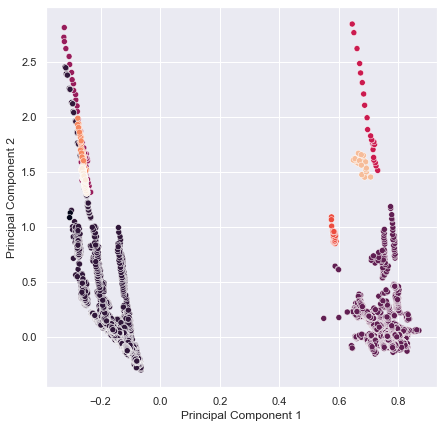

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.5, 5)

#### 9 Clusters


In [ ]:
clusters_9 = dbscan_df.groupby('9Clusters')

In [ ]:
clusters_9.get_group(0)

Country  Year ISO_CODE  Longitude   Latitude  Commodity_ID  \
0      Afghanistan  1960      AFG  67.709953  33.939110        410000   
2      Afghanistan  1960      AFG  67.709953  33.939110        430000   
3      Afghanistan  1960      AFG  67.709953  33.939110        440000   
4      Afghanistan  1961      AFG  67.709953  33.939110        410000   
6      Afghanistan  1961      AFG  67.709953  33.939110        430000   
...            ...   ...      ...        ...        ...           ...   
27488     Zimbabwe  2012      ZWE  29.154857 -19.015438        410000   
27489     Zimbabwe  2012      ZWE  29.154857 -19.015438        430000   
27490     Zimbabwe  2012      ZWE  29.154857 -19.015438        440000   
27491     Zimbabwe  2012      ZWE  29.154857 -19.015438        459100   
27492     Zimbabwe  2012      ZWE  29.154857 -19.015438        459200   

      Commodity_Description  Principal Component 1  Principal Component 2  \
0                     Wheat              -0.150607               0.002391   
2                    Barley              -0.150947              -0.005762   
3                      Corn              -0.150922              -0.005033   
4                     Wheat              -0.150490               0.004776   
6                    Barley              -0.150903              -0.003190   
...                     ...                    ...                    ...   
27488                 Wheat              -0.111236              -0.124257   
27489                Barley              -0.110860              -0.125382   
27490                  Corn              -0.111551              -0.117322   
27491                Millet              -0.110779              -0.124761   
27492               Sorghum              -0.110782              -0.124688   

       Principal Component 3  Principal Component 4  Principal Component 5  \
0                  -0.123363               0.006908              -0.030721   
2                  -0.128874              -0.020236              -0.035822   
3                  -0.128382              -0.017928              -0.035608   
4                  -0.123356               0.010815              -0.029581   
6                  -0.128669              -0.015471              -0.032142   
...                      ...                    ...                    ...   
27488               0.039686              -0.027614              -0.020841   
27489               0.038528              -0.032301              -0.033994   
27490               0.044968              -0.002910               0.002339   
27491               0.038904              -0.030214              -0.034801   
27492               0.038960              -0.029945              -0.034516   

       Principal Component 6  Principal Component 7  Principal Component 8  \
0                   0.031012               0.091161               0.007308   
2                   0.020686               0.086535              -0.001752   
3                   0.021892               0.086874              -0.000901   
4                   0.026976               0.061034               0.011971   
6                   0.014634               0.057349               0.003142   
...                      ...                    ...                    ...   
27488               0.027007               0.131516              -0.019453   
27489               0.037335               0.126488              -0.021056   
27490               0.017949               0.142032              -0.011231   
27491               0.039167               0.126414              -0.020446   
27492               0.039036               0.126537              -0.020359   

       8Clusters  9Clusters  10Clusters  
0              0          0           0  
2              0          0           0  
3              0          0           0  
4              0          0           0  
6              0          0           0  
...          ...        ...         ...  
27488          0          0           0  

Estimated number of clusters: 9
Silhouette Coefficient: 0.645
Estimated number of noise points: 10


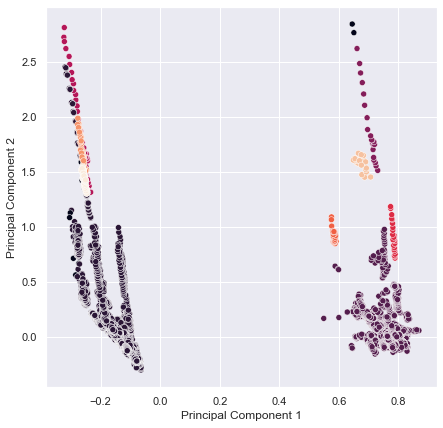

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.485, 7)

#### 10 Clusters


In [ ]:
clusters_10 = dbscan_df.groupby('10Clusters')

In [ ]:
clusters_10.get_group(9)

In [ ]:
dbscan_2d_scatter(pca_var95_df, 0.475, 7)

Estimated number of clusters: 10
Silhouette Coefficient: 0.654
Estimated number of noise points: 11
